In [6]:
'''
正态性检验
    利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合度假设检验。
    
    直方图初判 / QQ图判断  / K-S检验
    
'''

'\n正态性检验\n    利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合度假设检验。\n    \n    直方图初判 / QQ图判断  / K-S检验\n    \n'

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

       value
0  10.832619
1  10.084257
2  10.645882
3  10.437723
4   9.169925


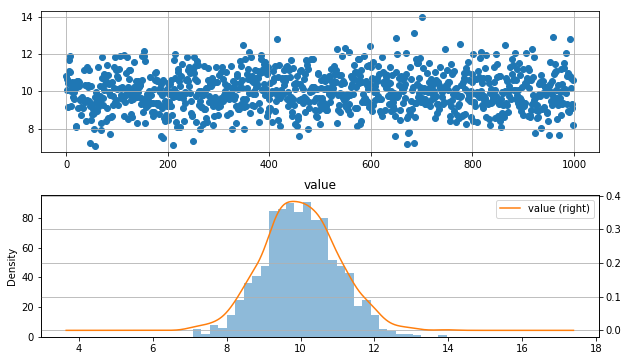

In [11]:
# 直方图初判

s = pd.DataFrame(np.random.randn(1000)+10,columns=['value'])
print(s.head())
        # 创建随机数据

fig = plt.figure(figsize =(10,6))  # 创建子图1
ax1 = fig.add_subplot(2,1,1)
ax1.scatter(s.index, s.values)
plt.grid()
        # 绘制数据分布图
    
ax2 = fig.add_subplot(2,1,2)  #创建子图2
s.hist(bins=30,alpha =0.5,ax = ax2)
s.plot(kind = 'kde',secondary_y = True,ax = ax2)
plt.grid()
    # 绘制直方图
    # 呈现较明显的正态性

       value
0  10.121255
1  10.144944
2  10.330306
3  10.777215
4  10.658199
均值为：10.51,标准差为:0.30
------------------
   index      value       p         q
0    746  10.002056 -0.0005 -1.720311
1    737  10.002247  0.0005 -1.719664
2    529  10.002797  0.0015 -1.717803
3    990  10.003625  0.0025 -1.715006
4     93  10.003777  0.0035 -1.714492
---------------------
四分之一位数为:10.26,四分之三位数为：10.78
--------------------


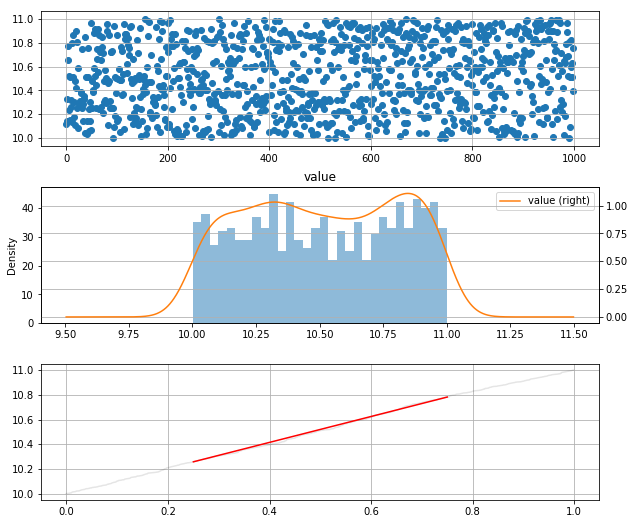

In [18]:
# QQ图判断
# QQ图通过把测试样本数据的分位数与已知分布相比较，从而来检验数据的分布情况

# QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图
# 参考直线； 四分之一分位点和四分之三分位点 这两点确定，看散点是否落在这掉线的附近

# 绘制思路

# ① 在做好数据清洗后，对数据进行排序（次序统计量：x(1）<x(2)<....x(n))
# ② 排序后，计算出每个数据对应的百分位p{i},即第i个数据x(i)为p(i)分位数，其中p(i)=(i-0.5)/n （pi有多重算法，这里以最常用方法为主）
# ③ 绘制直方图 + qq图，直方图作为参考


s = pd.DataFrame(np.random.rand(1000)+10,columns=['value'])
print(s.head())
    #创建随机数据

mean = s['value'].mean()
std = s['value'].std()
print('均值为：%.2f,标准差为:%.2f'%(mean,std))
print('------------------')
    # 计算均值  标准差

s.sort_values(by = 'value',inplace = True)  # 重新排序
s_r = s.reset_index(drop = False)    # 重新排序后，更新index
s_r['p'] = (s_r.index - 0.5)/len(s_r)
s_r['q'] = (s_r['value']-mean)/std
print(s_r.head())
print('---------------------')
        # 计算百位数 p（i)
        # 计算q值
        
st = s['value'].describe()
x1,y1 = 0.25,st['25%']
x2,y2 = 0.75,st['75%']
print('四分之一位数为:%.2f,四分之三位数为：%.2f'%(y1,y2))
print('--------------------')

fig = plt.figure(figsize = (10,9))
ax1 = fig.add_subplot(3,1,1) # 创建子图1
ax1.scatter(s.index,s.values)
plt.grid()
    # 绘制数据分布图

ax2 = fig.add_subplot(3,1,2) # 创建子图2
s.hist(bins=30,alpha = 0.5,ax =ax2)
s.plot(kind='kde',secondary_y =True,ax =ax2)
plt.grid()
    # 绘制直方图

ax3 = fig.add_subplot(3,1,3)  # 创建子图3
ax3.plot(s_r['p'],s_r['value'],'k',alpha=0.1)
ax3.plot([x1,x2],[y1,y2],'-r')
plt.grid()
    # 绘制qq图，直线为四分之一位数，四分之三位数的连线，基本符合正态分布

样本均值为：79.74,样本标准差为: 5.94
实际观测D值为:0.1597


,血糖浓度,次数,累计次数,累计频率,标准化取值,理论分布,D
0,68,2,2,0.057143,-1.977701,0.0244,0.032743
1,72,2,4,0.114286,-1.304031,0.0968,0.017486
2,75,2,6,0.171429,-0.798779,0.2148,0.043371
3,76,2,8,0.228571,-0.630362,0.2643,0.035729
4,77,6,14,0.400000,-0.461945,0.3228,0.077200
5,78,3,17,0.485714,-0.293527,0.3859,0.099814
6,80,6,23,0.657143,0.043307,0.5160,0.141143
7,81,3,26,0.742857,0.211725,0.5832,0.159657
8,84,2,28,0.800000,0.716977,0.7611,0.038900
9,86,2,30,0.857143,1.053811,0.8531,0.004043


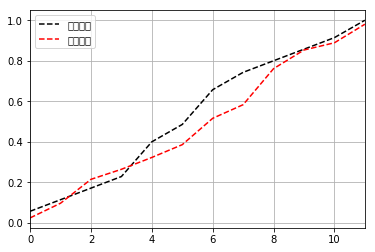

In [27]:
# KS检验，理论推导

data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度

df = pd.DataFrame(data,columns=['value'])

u = df['value'].mean()  #均值
std = df['value'].std()  #标准差
print('样本均值为：%.2f,样本标准差为: %.2f'%(u,std))
    # 查看数据基本统计量

s = df['value'].value_counts().sort_index()
df_s = pd.DataFrame({'血糖浓度':s.index,'次数':s.values})
    # 创建频率数据

df_s['累计次数'] = df_s['次数'].cumsum()
df_s['累计频率'] = df_s['累计次数']/ len(data)
df_s['标准化取值'] = (df_s['血糖浓度'] - u) / std
df_s['理论分布'] =[0.0244,0.0968,0.2148,0.2643,0.3228,0.3859,0.5160,0.5832,0.7611,0.8531,0.8888,0.9803]  # 通过查阅正太分布表
df_s['D'] = np.abs(df_s['累计频率']-df_s['理论分布'])
dmax = df_s['D'].max()
print('实际观测D值为:%.4f'%dmax)


df_s['累计频率'].plot(style='--k')
df_s['理论分布'].plot(style='--r')
plt.legend(loc='upper left')
plt.grid()
    # 密度图表示
df_s

In [28]:
# 直接用算法做KS检验

from scipy import stats
    # scipy 包是一个高级的科学计算库，它和Numpy联系很密切，Scrpy 一般都是操控Numpy数组来进行科学计算

data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度

df = pd.DataFrame(data,columns=['value'])
u = df['value'].mean()   # 均值
std = df['value'].std()  # 计算标准差
stats.kstest(df['value'],'norm',(u,std))
    # .kstest方法： KS检验，参数分别是 ：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
    # 结果返回两个值： statistic —D值，pvalue -P值
    # p值大于0.05，为正态分布


KstestResult(statistic=0.1590180704824098, pvalue=0.3066297258358026)

In [29]:
help(pd.Series.loc)

Help on property:

    Access a group of rows and columns by label(s) or a boolean array.
    
    ``.loc[]`` is primarily label based, but may also be used with a
    boolean array.
    
    Allowed inputs are:
    
    - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
      interpreted as a *label* of the index, and **never** as an
      integer position along the index).
    - A list or array of labels, e.g. ``['a', 'b', 'c']``.
    - A slice object with labels, e.g. ``'a':'f'``.
    
      .. warning:: Note that contrary to usual python slices, **both** the
          start and the stop are included
    
    - A boolean array of the same length as the axis being sliced,
      e.g. ``[True, False, True]``.
    - A ``callable`` function with one argument (the calling Series, DataFrame
      or Panel) and that returns valid output for indexing (one of the above)
    
    See more at :ref:`Selection by Label <indexing.label>`
    
    Raises
    ------
    KeyError:
        w

In [31]:
258.9* 10000/15

172600.0

In [38]:
urls=[]
for i in range(0,90,15):
    print(i)
    url ='http://m.maoyan.com/review/v2/comments.json?movieId=1211270&userId=-1&offset=%i&limit=15&ts=1566365411311&type=3'%i
    print(url)
    urls.append(url)
    
print(urls)


0
http://m.maoyan.com/review/v2/comments.json?movieId=1211270&userId=-1&offset=0&limit=15&ts=1566365411311&type=3
15
http://m.maoyan.com/review/v2/comments.json?movieId=1211270&userId=-1&offset=15&limit=15&ts=1566365411311&type=3
30
http://m.maoyan.com/review/v2/comments.json?movieId=1211270&userId=-1&offset=30&limit=15&ts=1566365411311&type=3
45
http://m.maoyan.com/review/v2/comments.json?movieId=1211270&userId=-1&offset=45&limit=15&ts=1566365411311&type=3
60
http://m.maoyan.com/review/v2/comments.json?movieId=1211270&userId=-1&offset=60&limit=15&ts=1566365411311&type=3
75
http://m.maoyan.com/review/v2/comments.json?movieId=1211270&userId=-1&offset=75&limit=15&ts=1566365411311&type=3
['http://m.maoyan.com/review/v2/comments.json?movieId=1211270&userId=-1&offset=0&limit=15&ts=1566365411311&type=3', 'http://m.maoyan.com/review/v2/comments.json?movieId=1211270&userId=-1&offset=15&limit=15&ts=1566365411311&type=3', 'http://m.maoyan.com/review/v2/comments.json?movieId=1211270&userId=-1&off